In [ ]:
pip install transformers

In [ ]:
import transformers
from transformers import pipeline
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer

In [ ]:
import os
import urllib.request
import warnings
import pandas as pd
import re
import numpy as np
from scipy.special import softmax
import csv
from tqdm import tqdm
from itertools import islice
import torch
import tensorflow

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
data_CHS_1 = '1-s2.0-S027323002200174X-mmc2.xlsx'
data_CHS_2 = '1-s2.0-S027323002200174X-mmc3.xlsx'
data_CHS_3 = '1-s2.0-S027323002200174X-mmc4.xlsx'
data_CHS_4 = '1-s2.0-S027323002200174X-mmc5.xlsx'

df_CHS_1 = pd.read_excel(data_CHS_1, ).fillna('')
df_CHS_2 = pd.read_excel(data_CHS_2, ).fillna('')
df_CHS_3 = pd.read_excel(data_CHS_3, ).fillna('')
df_CHS_4 = pd.read_excel(data_CHS_4, ).fillna('')


In [ ]:
df_pos1 = df_CHS_1[df_CHS_1['Abstract'].str.contains('chlorine', case=False, na=False)]
print("Rows where 'abstract' contains 'chlorine in data_CHS_1':", df_pos1)

df_pos2 = df_CHS_2[df_CHS_2['Abstract'].str.contains('chlorine', case=False, na=False)]
print("Rows where 'abstract' contains 'chlorine in data_CHS_2':", df_pos2)

df_pos3 = df_CHS_3[df_CHS_3['Abstract'].str.contains('chlorine', case=False, na=False)]
print("Rows where 'abstract' contains 'chlorine in data_CHS_3':", df_pos3)

df_pos4 = df_CHS_4[df_CHS_4['Abstract'].str.contains('chlorine', case=False, na=False)]
print("Rows where 'abstract' contains 'chlorine in data_CHS_4':", df_pos4)

Rows where 'abstract' contains 'chlorine in data_CHS_1':                                             short_title  \
0     Evaluation of water washes for the removal of ...   
102   HEAVY-METALS, CHLORINE AND ANTIBIOTIC-RESISTAN...   
109   Efficacy of chlorine disinfection of soft cont...   
112   EFFECTS OF OZONE, CHLORINE DIOXIDE, CHLORINE, ...   
121   THE INCIDENCE OF SALMONELLA ON POULTRY CARCASS...   
...                                                 ...   
9531  Effect of disinfectant, water age, and pipe ma...   
9534  Residual toxicity of several disinfectants in ...   
9535  Impact of the ultraviolet disinfection process...   
9536  Feed-forward dose control of wastewater chlori...   
9537  Thermal and biocidal (chlorine) effects on fre...   

                                               Abstract       Label  \
0     The effectiveness of distd. water and water co...  Irrelevant   
102   The susceptibility of Escherichia coli strains...  Irrelevant   
109   We evaluated th

In [ ]:
#################################################################################################
#################################################################################################
#################################################################################################

import pandas as pd

DF = [df_CHS_1, df_CHS_2, df_CHS_3, df_CHS_4]
DATASET = pd.concat(DF, ignore_index=True)

print(len(DATASET))


38117


In [ ]:
from sklearn.model_selection import train_test_split

Y = DATASET
Y_train, Y_test = train_test_split(Y, test_size=0.30, random_state=42)

print("y_train shape:", len(Y_train))
print("y_test shape:", len(Y_test))

y_train shape: 26681
y_test shape: 11436


In [ ]:
from transformers import RobertaModel, RobertaTokenizer
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim
import pandas as pd

# Loading pre-trained RoBERTa model and tokenizer
model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaModel.from_pretrained(model_name)


data = ["Y_train"]
tokenized_data = tokenizer(data, padding=True, truncation=True, return_tensors="pt", max_length=512)

# Forward pass through the model to obtain embeddings
with torch.no_grad():
    outputs = model(**tokenized_data)

last_hidden_states = outputs.last_hidden_state

cls_embedding = last_hidden_states[:, -1, :]

# Print the embedding
print("Embedding shape:", cls_embedding.shape)
print("Embedding values:", cls_embedding)



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Embedding shape: torch.Size([1, 768])
Embedding values: tensor([[-3.7020e-02,  6.1613e-02, -4.9824e-02, -6.9952e-02,  3.7402e-02,
         -2.7218e-02, -2.3624e-02,  8.4407e-03,  2.2243e-02, -8.0593e-02,
          1.0341e-02,  3.3824e-02,  2.0991e-02, -1.6952e-03,  7.1109e-02,
         -9.9924e-03, -6.2682e-03,  4.7647e-02, -2.6216e-02, -3.2137e-02,
         -1.2972e-01,  5.8339e-02, -2.3273e-02,  1.0023e-01,  7.7243e-05,
          5.2231e-02,  6.0426e-02,  8.2494e-02, -6.7028e-03,  9.8774e-03,
         -9.6862e-02, -5.1687e-02,  4.8369e-02, -5.3451e-02,  4.2849e-02,
          8.5443e-02,  2.9590e-02,  7.7124e-03, -1.4939e-01,  3.2285e-04,
         -6.6488e-02,  4.4081e-02,  4.9148e-02, -1.0083e-02,  1.0669e-01,
          3.1988e-02,  4.7224e-02, -4.5256e-03, -2.8603e-02, -2.3207e-02,
          6.1717e-02,  8.6431e-02, -2.5487e-02, -5.8294e-02, -8.6327e-02,
          6.8929e-02,  7.6393e-02,  8.2868e-02,  3.7643e-02, -4.6030e-02,
          4.5527e-02, -5.1349e-03, -9.6538e-02, -1.6817e

In [ ]:
# Access the layers
num_layers = model.config.num_hidden_layers
print(f"Number of Layers: {num_layers}")

Number of Layers: 12


In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch


model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)


sentence_A = "chlorine efficacy"
#sentence_B = "In a classical scheme of drinking water treatment, chlorine can be used at different locations: chlorination of the raw water before the coagulation process and disinfection of water after the filtration step. The objectives of this work are the study of the disinfection kinetics and the chlorine decay characteristics, when sodium hypochlorite is used for disinfecting natural and potable waters. For this, batch reactor tests have been done. Experiments conducted have revealed that the processes are not uniform. A Haas and Karra model has been used for the formulation of chlorine demand of natural and clarified waters. For disinfection kinetics, it was supposed that the indicator organisms in the water are globally distributed in two main categories: resistant (or less accessible to the disinfectant) and less resistant (or more accessible to the disinfectant). Thus the survival ratio can be expressed in the form of a sum of two exponential relations. In order to estimate the influence of the hydraulic characteristics of chlorine contact chambers on disinfection process performances, we have used a model of j completely stirred tank reactors (CSTRs) in series was used. The mean conversion of batch kinetics in the entire contactor can by obtained by applying the segregated flow model. Using this approach, it was noticed that the impact of the reactor design on its performance is variable according to the quality of the water treated."

# List to store logits for each iteration
all_logits = []

# Loop over sentence_B values from the Excel sheet
for index, row in Y_test.iterrows():
    sentence_B = row['Label']  # Replace with the actual column name
    print(f"\nProcessing row {index + 1}")
    print(f"Sentence B: {sentence_B}")


tokenized_data = tokenizer('list[sentence_A]', 'list[sentence_B]', padding=True, truncation=True, return_tensors="pt", max_length=512)

# Forward pass through the classification model
with torch.no_grad():
    outputs = model(**tokenized_data)

# Get the logits from the model outputs and Pass the logits through a linear layer for classification
logits = outputs.logits


def classification_logits(embeddings):
    cls_embeddings = embeddings[:, -1, :]
    return model.classifier(cls_embeddings)


predicted_labels = torch.argmax(logits, dim=1)

relation_map = {0: "entailment", 1: "contradiction", 2: "Neutral"}
predicted_relations = relation_map[predicted_labels.item()]


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Streaming output truncated to the last 5000 lines.
Processing row 24586
Sentence B: nan

Processing row 2620
Sentence B: Relevant

Processing row 35700
Sentence B: nan

Processing row 14604
Sentence B: Irrelevant

Processing row 19876
Sentence B: Irrelevant

Processing row 30282
Sentence B: nan

Processing row 32156
Sentence B: nan

Processing row 36076
Sentence B: nan

Processing row 32576
Sentence B: nan

Processing row 17980
Sentence B: Irrelevant

Processing row 35373
Sentence B: nan

Processing row 20306
Sentence B: nan

Processing row 151
Sentence B: Relevant

Processing row 2373
Sentence B: Relevant

Processing row 34910
Sentence B: nan

Processing row 21748
Sentence B: nan

Processing row 30738
Sentence B: nan

Processing row 26489
Sentence B: nan

Processing row 20419
Sentence B: nan

Processing row 5380
Sentence B: Irrelevant

Processing row 5118
Sentence B: Irrelevant

Processing row 6940
Sentence B: Irrelevant

Processing row 36194
Sentence B: nan

Processing row 33058
Sent

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/11, Loss: 0.9849409063657125, Accuracy: 100.0%
Epoch 2/11, Loss: 1.1931255261103313, Accuracy: 0.0%
Epoch 3/11, Loss: 1.0832136472066243, Accuracy: 33.33333333333333%
Epoch 4/11, Loss: 1.1060283184051514, Accuracy: 33.33333333333333%
Epoch 5/11, Loss: 1.3006839354832966, Accuracy: 0.0%
Epoch 6/11, Loss: 1.0964898467063904, Accuracy: 33.33333333333333%
Epoch 7/11, Loss: 1.2074570655822754, Accuracy: 0.0%
Epoch 8/11, Loss: 1.2652751207351685, Accuracy: 0.0%
Epoch 9/11, Loss: 1.1558524370193481, Accuracy: 0.0%
Epoch 10/11, Loss: 1.0769696434338887, Accuracy: 33.33333333333333%
Epoch 11/11, Loss: 1.0021459062894185, Accuracy: 66.66666666666666%


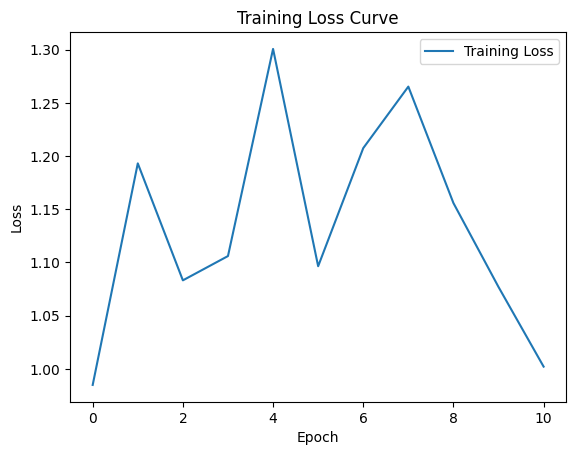

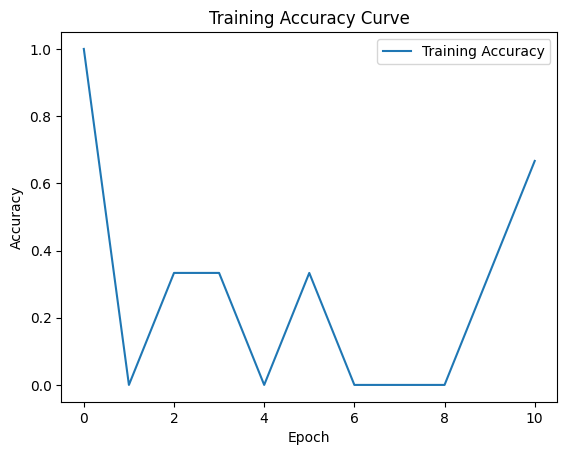

In [ ]:
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

predicted_relations = [0, 1, 2]

predicted_relations_tensor = torch.tensor(predicted_relations)

model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Hyperparameters
batch_size = 1
learning_rate = 1e-5
num_epochs = 11

# DataLoader
train_dataset = TensorDataset(predicted_relations_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)


losses = []
accuracies = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for inputs in train_loader:
        inputs = inputs[0].unsqueeze(0)
        labels = torch.randint(0, 3, (1,))

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.logits, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        # Calculate accuracy
        _, predicted_labels = torch.max(outputs.logits, 1)
        correct_predictions += (predicted_labels == labels).sum().item()
        total_samples += labels.size(0)

    # Calculate average loss and accuracy for the epoch
    avg_epoch_loss = epoch_loss / len(train_loader)
    accuracy = correct_predictions / total_samples
    losses.append(avg_epoch_loss)
    accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_epoch_loss}, Accuracy: {accuracy * 100}%")


plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Curve')
plt.legend()
plt.show()
